In [2]:
import pandas as pd

In [4]:
train = pd.read_csv('train/data_0.csv')
train.head()

,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111,anomaly
0,18.495860,13.766527,14.362624,0.0,0.0,0.0,1.0,0.0
1,18.501072,13.827225,14.270268,0.0,0.0,1.0,0.0,0.0
2,18.405950,13.868976,14.094804,1.0,0.0,0.0,0.0,0.0
3,18.444572,13.910701,14.116078,0.0,1.0,0.0,0.0,0.0
4,18.418470,13.933917,14.320566,0.0,0.0,0.0,1.0,0.0


In [5]:
test = pd.read_csv('train/data_0.csv')
test.head()

,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111,anomaly
0,18.495860,13.766527,14.362624,0.0,0.0,0.0,1.0,0.0
1,18.501072,13.827225,14.270268,0.0,0.0,1.0,0.0,0.0
2,18.405950,13.868976,14.094804,1.0,0.0,0.0,0.0,0.0
3,18.444572,13.910701,14.116078,0.0,1.0,0.0,0.0,0.0
4,18.418470,13.933917,14.320566,0.0,0.0,0.0,1.0,0.0


In [7]:
models_results = pd.read_csv('model_results.csv')
models_results.head()

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,CNN-LSTM,0.940393,0.408907,0.250932,0.311008,0.615191
1,LSTM,0.946254,0.441176,0.009317,0.018248,0.504324
2,Dense,0.946154,0.493694,0.170186,0.253118,0.580149


In [9]:
anomaly_detection_results = pd.read_csv('anomalies_detected.csv')
anomaly_detection_results.head()

,CNN-LSTM,LSTM,Dense
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [10]:
cnn_lstm_counts = anomaly_detection_results['CNN-LSTM'].value_counts()
lstm_counts = anomaly_detection_results['LSTM'].value_counts()
dense_counts = anomaly_detection_results['Dense'].value_counts()

print("\nCount of values in CNN-LSTM column:")
print(cnn_lstm_counts)

print("\nCount of values in LSTM column:")
print(lstm_counts)

print("\nCount of values in Dense column:")
print(dense_counts)


Count of values in CNN-LSTM column:
False    6516
True      107
Name: CNN-LSTM, dtype: int64

Count of values in LSTM column:
False    6623
Name: LSTM, dtype: int64

Count of values in Dense column:
False    6395
True      228
Name: Dense, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
from data_handler import DataHandler

data_handler = DataHandler()
data_handler.load_data()
X_train, y_train, X_test, y_test = data_handler.preprocess_data()


Class Counts: {0.0: 127656, 1.0: 126854}
Class Percentages: {0.0: 50.157557659816895, 1.0: 49.8424423401831}


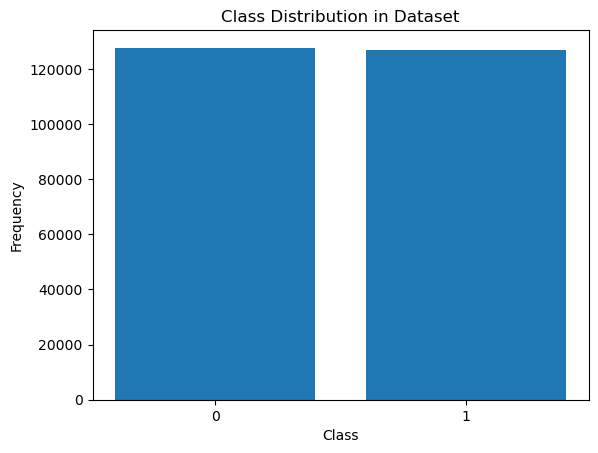

In [11]:
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))

total_counts = np.sum(counts)
class_percentages = {k: (v / total_counts) * 100 for k, v in class_counts.items()}

print("Class Counts:", class_counts)
print("Class Percentages:", class_percentages)

plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in Dataset')
plt.xticks(list(class_counts.keys()))
plt.show()